In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_excel('animals-weight.xlsx')

In [77]:
df = df.drop('Animals', 1)

In [146]:
df.head()

,Body Weight,Brain Weight
0,-0.226553,-0.302590
1,0.286742,0.140292
2,-0.186451,-0.183677
3,-0.196022,-0.188481
4,-0.210184,-0.206414


Normalizando

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
df2 = scaler.transform(df[:])
df.param = pd.DataFrame(df2, columns = df.columns[:])

Treinando

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Brain Weight',axis=1), 
                                                    df['Brain Weight'], test_size=0.30)

In [4]:
from sklearn.linear_model import LinearRegression

In [105]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.coef_

array([0.00172915])

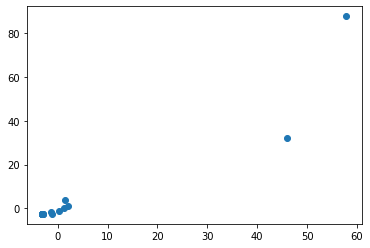

In [109]:
predict = lm.predict(x_test)
plt.scatter(y_test, predict)

In [110]:
res = []
y_true = y_test.to_list()

mini = [999]
maxi = -999

for i in range(0, len(predict)):
    n = []
    
    n.append(predict[i] * 100)
    n.append(y_true[i] * 100)
    res.append(n)
    
    dif = abs(predict[i] - y_true[i])
    
    if dif < mini:
        mini = dif
    if dif > maxi:
        maxi = dif
    
print(res)
print(mini)
print(maxi)

[[-24.774406451591144, -29.81069127543252], [-24.58466630355655, -29.78934241749085], [-24.43550485075108, -29.832040133374193], [-24.543985907336882, -30.451157013682668], [320.6020557524432, 460.220319488726], [38.280105987911675, 14.02918850779005], [0.5964989564211199, 13.602211348956619], [-24.77450747457509, -31.10870183828616], [-23.85241917160244, -12.016418181049268], [-17.24863485194216, -12.443395339882699], [-24.63348277902016, -30.536552445449356], [877.5166799997685, 578.5997367752948], [-13.248395890340973, 3.5682481163709805], [-24.77450679656848, -31.096959966418236], [-24.774491609220565, -30.80341316972025], [-24.774401705544914, -30.75004102486607], [-24.774497982482632, -30.9955528911953], [9.125822030479254, 21.181055918250028]]
0.048052395120594615
2.9891694322447364


In [137]:
#scaler2 = StandardScaler()
#scaler2.set_params = scaler.get_params